In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from shapely.geometry import Point
from folium.plugins import HeatMap

In [5]:
chipotle_df = pd.read_csv('data/chipotle_stores.csv')

chipotle_df.info()

chipotle_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629 entries, 0 to 2628
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      2629 non-null   object 
 1   location   2629 non-null   object 
 2   address    2629 non-null   object 
 3   latitude   2629 non-null   float64
 4   longitude  2629 non-null   float64
dtypes: float64(2), object(3)
memory usage: 102.8+ KB


,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220


In [6]:
us_map = gpd.read_file('data/us-states.json')

us_map.head()

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.3593 35.00118, -85.60668 34.9847..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.0425 37.00026, -109.04798 31.33..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


In [ ]:
# Convert chipotle data to geo data frame
chipotle_gdf = gpd.GeoDataFrame(
    chipotle_df, 
    geometry=gpd.points_from_xy(chipotle_df.longitude, chipotle_df.latitude),
    crs='EPSG:4326')

chipotle_gdf.head()

,state,location,address,latitude,longitude,geometry
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,POINT (-85.48733 32.60681)
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756,POINT (-86.80276 33.50972)
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437,POINT (-86.64744 33.59558)
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279,POINT (-86.69828 33.42258)
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220,POINT (-86.84122 34.15413)


## Basic EDA

In [9]:
chipotle_df.isnull().sum()

state        0
location     0
address      0
latitude     0
longitude    0
dtype: int64

In [10]:
chipotle_df.describe()

,latitude,longitude
count,2629.000000,2629.000000
mean,37.515979,-92.490287
std,4.749089,16.578616
min,25.479009,-124.183611
25%,33.876535,-105.095673
50%,38.898082,-87.180851
75%,40.813125,-78.879958
max,48.785206,-68.753750


In [14]:
#Number of stores in each state
store_count = chipotle_df['state'].value_counts()

print(store_count)

state
California        421
Texas             226
Ohio              193
Florida           177
New York          160
Illinois          144
Virginia          107
Pennsylvania       96
Maryland           94
Arizona            85
Colorado           79
Minnesota          71
New Jersey         69
North Carolina     65
Massachusetts      62
Georgia            61
Washington         43
Indiana            40
Michigan           39
Missouri           39
Oregon             32
Kansas             30
Nevada             29
Tennessee          26
Connecticut        24
Kentucky           21
South Carolina     21
Washington DC      21
Wisconsin          20
Alabama            15
Oklahoma           12
Utah               11
Nebraska           10
Louisiana          10
Iowa               10
New Mexico          9
Rhode Island        9
Delaware            9
New Hampshire       8
West Virginia       6
Arkansas            6
Maine               5
Idaho               4
Montana             3
Mississippi         2
Verm

## Visualize Locations on Map

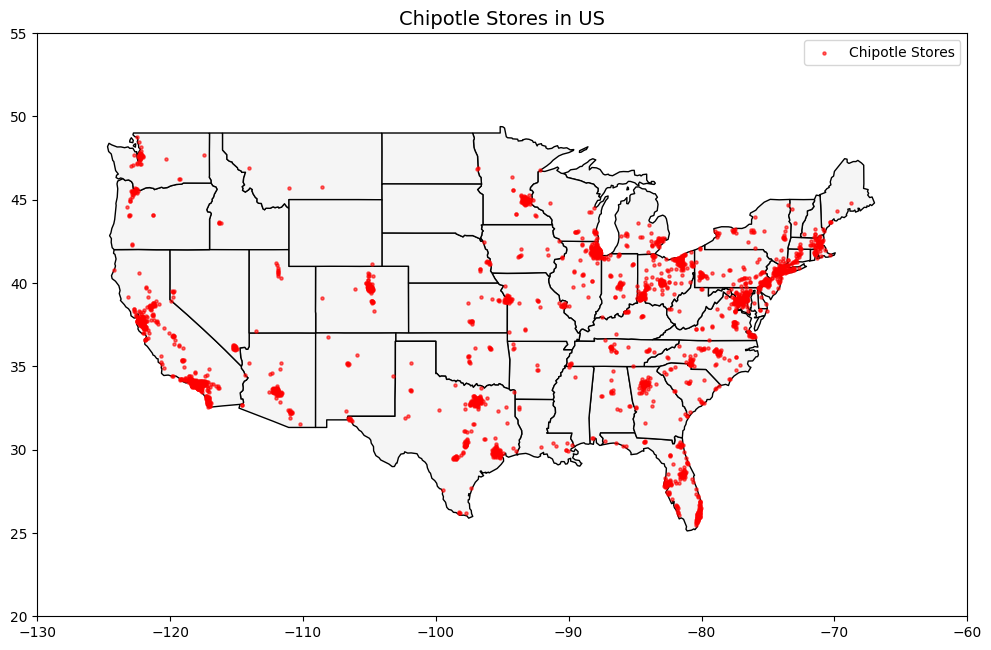

In [23]:
us_states = gpd.read_file('data/us-states.json')

# Ensure the US map is in the correct coordinate reference system
us_states = us_states.to_crs(epsg=4326)  # Convert to WGS 84 if not already

# Adjust the plot to focus on the continental US
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the US states
us_states.plot(ax=ax, color="whitesmoke", edgecolor="black")

# Plot the Chipotle locations
chipotle_gdf.plot(ax=ax, color="red", markersize=5, alpha=0.6, label="Chipotle Stores")

# Set axis limits to focus on the continental US (ignore Alaska/Hawaii)
ax.set_xlim([-130, -60])  # Longitude limits
ax.set_ylim([20, 55])  # Latitude limits

# Add title and legend
plt.title("Chipotle Stores in US", fontsize=14)
plt.legend()
plt.show()


In [19]:
# Interactive Map

# Folium map centered on USA
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add chipotle stores to map
for idx, row in chipotle_df.iterrows():
    folium.CircleMarker(
    location=[row['latitude'], row['longitude']], 
    radius=3,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.6,
    ).add_to(us_map)

# Save + Display map
us_map.save('chipotle_stores.html')
us_map

In [21]:
# Heatmap

heatmap = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Heatmap layer
HeatMap(data=chipotle_df[['latitude', 'longitude']], radius=10).add_to(heatmap)

# Save + Display map
heatmap.save('chipotle_heatmap.html')
heatmap